In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import tweepy
import numpy as np

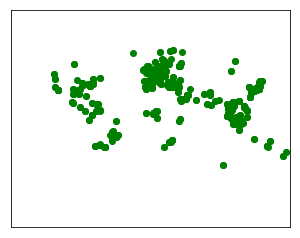

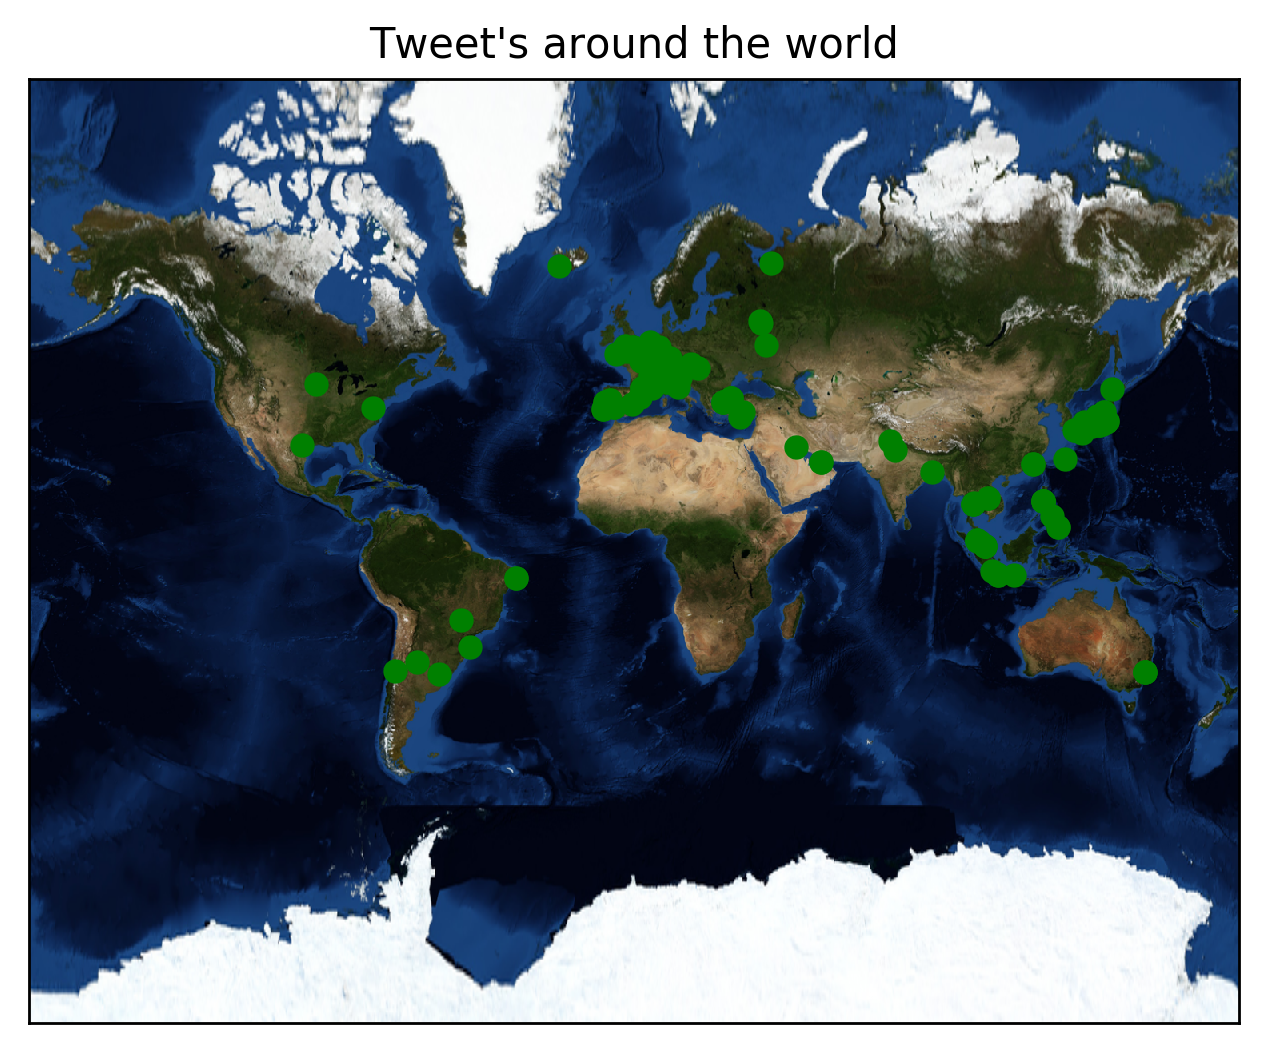

In [12]:
class TwitterStreamListener(tweepy.StreamListener):
    """ A listener handles tweets are the received from the stream.
    This is a basic listener that just prints received tweets to stdout.
    """

    def on_status(self, status):
        self.get_tweet(status)

    def on_error(self, status_code):
        if status_code == 403:
            print("The request is understood, but it has been refused or access is not allowed. Limit is maybe reached")
            return False

    @staticmethod
    def get_tweet(tweet):

        if tweet.coordinates is not None:
            x, y = map(tweet.coordinates['coordinates'][0], tweet.coordinates['coordinates'][1])
            map.plot(x, y, 'ro', markersize=2)
            plt.draw()
            plt.show
        

if __name__ == '__main__':

    # Size of the map
    fig = plt.figure(figsize=(20, 5), dpi=250)

    plt.title("Tweet's around the world")
    
    # Declare map projection, size and resolution
    map = Basemap(projection='merc',
                      llcrnrlat=-80,
                      urcrnrlat=80,
                      llcrnrlon=-179,
                      urcrnrlon=179,
                      lat_ts=20,
                      resolution='l')

    map.bluemarble(scale=0.3)

    # Set interactive mode ON
    plt.ion()
    # Display map
    plt.show()

    consumer_key ='bI7M1ccBIfLXeHHPe0Y7HoP88'
    consumer_secret='i2cc8Sk8JjkxUCMFPTUVb0QkyWb8VtZTsECypwH8tHxOZG4qWJ'

    access_token='3253774136-RfsQpz3kqLTNXpBuxeKLQT8xXJp621IVwg5MSM9'
    access_token_secret='AaF5mpC8DiMLuKTADJIAWqYD0mfScN0uIHMYjTnOLy74R'

    # Authentication
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.secure = True
    auth.set_access_token(access_token, access_token_secret)

    api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, retry_count=10, retry_delay=5,
        retry_errors=5)

    streamListener = TwitterStreamListener()
    myStream = tweepy.Stream(auth=api.auth, listener=streamListener)

    myStream.filter(locations=[-180, -90, 180, 90], async=True)